## Agregação por distrito

Nesse notebook é feita a agregação dos dados por distritos do município

In [1]:
import geopandas as gpd
from shapely.geometry import LineString
from utils.load_csv import load_csv
from utils.load_shp import load_shp

In [2]:
df_final = load_csv("df_final.csv")

distritos = load_shp("distritos.shp")

In [3]:
df_final["lon"] = df_final["ponto_inicial"].apply(lambda x: eval(x)[0])
df_final["lat"] = df_final["ponto_inicial"].apply(lambda x: eval(x)[1])

In [4]:
gdf = gpd.GeoDataFrame(df_final, geometry=gpd.points_from_xy(df_final.lon, df_final.lat), crs="EPSG:4326")

In [5]:
trajetos = gdf.groupby("id_onibus")["geometry"].apply(lambda x: LineString(x.tolist()))
trajetos = gpd.GeoDataFrame(trajetos, geometry="geometry", crs="EPSG:4326").reset_index()

<Axes: >

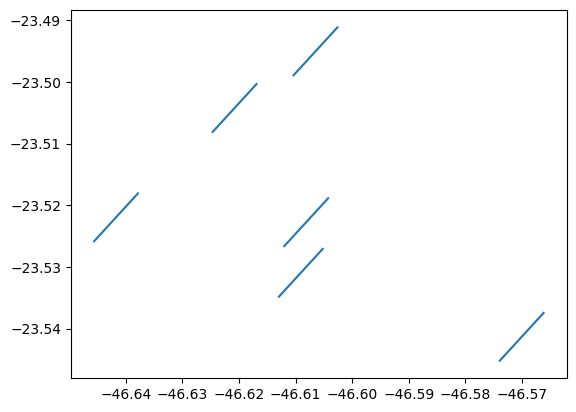

In [6]:
trajetos.plot()

In [7]:
trajetos = trajetos.to_crs(distritos.crs)

In [8]:
trajetos_distritos = gpd.sjoin(trajetos, distritos, how="inner", predicate="intersects")

trajetos_distritos

,id_onibus,geometry,index_right,cd_identif,cd_identi0,cd_distrit,nm_distrit,sg_distrit,tx_escala,sg_fonte_o,dt_criacao,dt_atualiz,cd_usuario,cd_tipo_di,qt_area_qu,qt_area_me
0,1001,"LINESTRING (335420.733 7397246.561, 335622.462...",91,8583399.0,25.0,56,PARI,PRI,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,2.730,2729940.52
0,1001,"LINESTRING (335420.733 7397246.561, 335622.462...",76,8583430.0,7.0,86,VILA GUILHERME,VGL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,7.201,7200560.70
1,1002,"LINESTRING (335553.706 7400313.049, 335755.483...",76,8583430.0,7.0,86,VILA GUILHERME,VGL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,7.201,7200560.70
1,1002,"LINESTRING (335553.706 7400313.049, 335755.483...",95,8583426.0,5.0,82,TUCURUVI,TUC,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,9.441,9441317.18
2,1003,"LINESTRING (334104.451 7399279.07, 334306.193 ...",69,8583413.0,5.0,70,SANTANA,STN,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,13.092,13091744.80
3,1004,"LINESTRING (331989.004 7397294.618, 332190.686...",39,8583449.0,9.0,9,BOM RETIRO,BRE,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,4.206,4205896.64
3,1004,"LINESTRING (331989.004 7397294.618, 332190.686...",69,8583413.0,5.0,70,SANTANA,STN,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,13.092,13091744.80
4,1005,"LINESTRING (335333.2 7396337.369, 335534.914 7...",52,8583450.0,25.0,10,BRAS,BRS,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,3.630,3629732.16
4,1005,"LINESTRING (335333.2 7396337.369, 335534.914 7...",79,8583448.0,25.0,8,BELEM,BEL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,6.047,6046777.42
5,1006,"LINESTRING (339329.18 7395232.734, 339530.935 ...",73,8583424.0,25.0,80,TATUAPE,TAT,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,8.514,8514313.05


In [9]:
# ônibus por distrito
onibus_por_distrito = trajetos_distritos.groupby("nm_distrit")["id_onibus"].nunique().reset_index()

# distância percorrida por distrito
distancia_por_onibus = df_final.groupby("id_onibus")["distancia_percorrida"].sum().reset_index()
trajetos_distritos = trajetos_distritos.merge(distancia_por_onibus, on="id_onibus")
dist_por_distrito = trajetos_distritos.groupby("nm_distrit")["distancia_percorrida"].sum().reset_index()

In [10]:
dist_por_distrito

,nm_distrit,distancia_percorrida
0,BELEM,0.014142
1,BOM RETIRO,0.014142
2,BRAS,0.014142
3,PARI,0.014142
4,SANTANA,0.028284
5,TATUAPE,0.014142
6,TUCURUVI,0.014142
7,VILA GUILHERME,0.028284


In [11]:
gdf_overlay = gpd.overlay(trajetos, distritos, how="intersection")

gdf_overlay['distancia'] = gdf_overlay.geometry.length

gdf_overlay

,id_onibus,cd_identif,cd_identi0,cd_distrit,nm_distrit,sg_distrit,tx_escala,sg_fonte_o,dt_criacao,dt_atualiz,cd_usuario,cd_tipo_di,qt_area_qu,qt_area_me,geometry,distancia
0,1001,8583430.0,7.0,86,VILA GUILHERME,VGL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,7.201,7200560.70,"LINESTRING (335760.168 7397623.07, 335824.198 ...",698.183024
1,1001,8583399.0,25.0,56,PARI,PRI,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,2.730,2729940.52,"LINESTRING (335420.733 7397246.561, 335622.462...",506.927106
2,1002,8583430.0,7.0,86,VILA GUILHERME,VGL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,7.201,7200560.70,"LINESTRING (335553.706 7400313.049, 335755.483...",950.726241
3,1002,8583426.0,5.0,82,TUCURUVI,TUC,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,9.441,9441317.18,"LINESTRING (336190.408 7401019.087, 336360.853...",254.496648
4,1003,8583413.0,5.0,70,SANTANA,STN,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,13.092,13091744.80,"LINESTRING (334104.451 7399279.07, 334306.193 ...",1205.192358
5,1004,8583449.0,9.0,9,BOM RETIRO,BRE,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,4.206,4205896.64,"LINESTRING (331989.004 7397294.618, 332190.686...",1111.836013
6,1004,8583413.0,5.0,70,SANTANA,STN,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,13.092,13091744.80,"LINESTRING (332733.31 7398120.565, 332795.767 ...",93.294290
7,1005,8583450.0,25.0,10,BRAS,BRS,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,3.630,3629732.16,"LINESTRING (335333.2 7396337.369, 335428.183 7...",141.859978
8,1005,8583448.0,25.0,8,BELEM,BEL,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,6.047,6046777.42,"LINESTRING (335428.183 7396442.737, 335534.914...",1063.216954
9,1006,8583424.0,25.0,80,TATUAPE,TAT,1:5000,GEOGSG,2004-01-01,2025-07-05,None,199299399,8.514,8514313.05,"LINESTRING (339329.18 7395232.734, 339530.935 ...",1205.015068


In [12]:
698.183024 + 950.726241

1648.909265

In [13]:
df_distrito = gdf_overlay.groupby('nm_distrit').agg({
    'distancia':'sum'
}).reset_index()

In [14]:
df_distrito

,nm_distrit,distancia
0,BELEM,1063.216954
1,BOM RETIRO,1111.836013
2,BRAS,141.859978
3,PARI,506.927106
4,SANTANA,1298.486648
5,TATUAPE,1205.015068
6,TUCURUVI,254.496648
7,VILA GUILHERME,1648.909265


In [15]:
#distritos = distritos.to_crs(gdf_overlay.crs)
#distritos = distritos.merge(onibus_por_distrito, on='nm_distrit', how='left')
#distritos = distritos.merge(dist_por_distrito, on='nm_distrit', how='left')
#distritos = distritos.rename(columns={'distancia_percorrida': 'distancia'})

# merge errado = pega só os distritos que tem ônibus
distritos = distritos.merge(df_distrito, on='nm_distrit', how='left')
distritos = distritos.fillna(0)

C:\Users\x050258\AppData\Local\Temp\ipykernel_29684\4048921540.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  distritos = distritos.fillna(0)


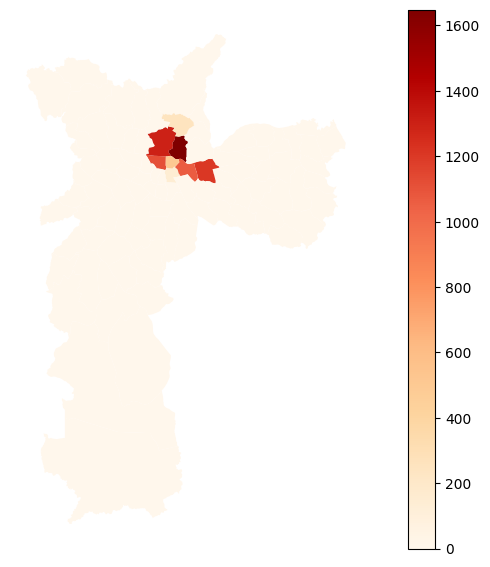

In [16]:
# teste

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(12,7))
distritos.plot(column='distancia', cmap='OrRd', legend=True, ax=ax)
ax.set_title("")
ax.axis('off')
plt.show()